In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import random
import os
from tqdm import tqdm

In [2]:
df_bg = pd.read_csv("ParlaMint-BG-SENT.csv", delimiter = ",", dtype = object)
df_bg = df_bg[df_bg["Speaker_role"]!= "Chairperson"]
df_bg = df_bg.drop(df_bg[(df_bg["Speaker_Minister"] == "-") & (df_bg["Speaker_MP"] == "notMP")].index)
df_bg["Word_total"] = df_bg["Word_total"].astype(float)
df_bg = df_bg[df_bg["Word_total"] > 10]
df_bg["Score"] = df_bg["Score"].astype(float)
df_bg["Sentiment"] = df_bg["Sentiment"].astype(float)
df_bg["Negscore"] = df_bg["Negscore"].astype(float)/df_bg["Word_total"]
df_bg = df_bg[df_bg["Comission"] == "False"]
pd.set_option('display.max_colwidth', None)

In [3]:
df_bg.loc[df_bg["ID"] == "ParlaMint-BG_2016-06-09.u31"]

,Unnamed: 0,ID,Sentiment,Word_total,Score,Negscore,Title,Date,Body,Term,...,Speaker_name,Speaker_gender,Speaker_birth,Topic_title,Meeting_type,Comission,YearMonth,Government,Caretaker,Bloc
200293,122,ParlaMint-BG_2016-06-09.u31,0.0,14.0,0.0,0.0,"Report of the meeting of the Bulgarian National Assembly, Term 43, Session 6, Meeting 204 (2016-06-09)",2016-06-09,NaN,43,...,"Борисов Главчев, Димитър",M,1963,ЗАКОНОПРОЕКТ ЗА РАТИФИЦИРАНЕ НА ГАРАНЦИОННОТО СПОРАЗУМЕНИЕ (ПРОЕКТ ЗА УКРЕПВАНЕ НА ГАРАНТИРАНЕТО НА ВЛОГОВЕТЕ) МЕЖДУ РЕПУБЛИКА БЪЛГАРИЯ И МЕЖДУНАРОДНАТА БАНКА ЗА ВЪЗСТАНОВЯВАНЕ И РАЗВИТИЕ.,ЗАКОНОПРОЕКТ,False,2016-06,Borisov II,False,Right


In [4]:
random.seed(6)
sample = random.sample(df_bg["ID"].to_list(), 1000)

In [5]:
df_bg.groupby("Party_status", dropna = False)["ID"].count()/len(df_bg)

Party_status
Coalition     0.355070
Opposition    0.517709
NaN           0.127221
Name: ID, dtype: float64

In [6]:
df_bg[df_bg["ID"].isin(sample)].groupby("Party_status", dropna = False)["ID"].count()/len(df_bg[df_bg["ID"].isin(sample)])

Party_status
Coalition     0.365
Opposition    0.496
NaN           0.139
Name: ID, dtype: float64

In [10]:
root = "ParlaMint-BG.TEI.CSV.SENT"
maximum = 100

with open("gold_standard_BG.txt", "w") as f:
    for speech_id in tqdm(sample[:300]):
        year = speech_id[13:17]
        file = speech_id.split(".")[0] + ".ana.sent.csv"
        filename = os.path.join(root, year, file)

        df = pd.read_csv(filename, delimiter = ",", index_col = 0, dtype = object)
        speecharray = df[df["id"] == speech_id]
                    
        speech_length = len(speecharray)
        if speech_length <= maximum:
            speech = " ".join(speecharray["token"].to_list())
            score = str(speecharray["sentiment"].astype(np.float64).sum() / len(speecharray))
            f.write("\t".join([speech_id, score, speech]))
            f.write("\n")
            
        else:
            last = speecharray["seg"].iloc[maximum]
            last_index = speecharray.loc[speecharray["seg"] == last].index[-1]
            speech_cut = speecharray.loc[:last_index]
            score = str(speech_cut["sentiment"].astype(np.float64).sum() / len(speech_cut))
            speech = " ".join(speech_cut["token"].to_list())
            f.write("\t".join([speech_id, score, speech]))
            f.write("\n")

100%|█████████████████████████████████████████| 300/300 [00:29<00:00, 10.25it/s]


In [13]:
df = pd.read_csv("ParlaMint-BG.TEI.CSV.SENT/2015/ParlaMint-BG_2015-02-05.ana.sent.csv", delimiter = ",", index_col = 0, dtype = object)

In [21]:
speecharray = df[df["id"] == "ParlaMint-BG_2015-02-05.u39"]

In [23]:
last = speecharray["seg"].iloc[100]
last_index = speecharray.loc[speecharray["seg"] == last].index[-1]
speech_cut = speecharray.loc[:last_index]
score = str(speech_cut["sentiment"].astype(np.float64).sum() / len(speech_cut))


In [27]:
speech_cut["sentiment"].astype(np.float64).sum()

0.0015784937820169098

In [35]:
gold = pd.read_csv("gold_standard_BG.txt", delimiter = "\t", names = ["id", "score", "speech"])

lengths = []
for speech in gold["speech"]:
    lengths.append(len(speech.split(" ")))

### Gold Standard CSV

In [9]:
gs_root = "/Users/yananikolova/Dropbox/ITCOG/Thesis/"
gs_score = pd.read_csv(gs_root + "annotated_BG_gold.tsv", delimiter = "\t", encoding = "utf-16le", usecols = [0,1,2,3,4,5], 
                names = ["ID", "Sentiment", "Speech", "Annotation", "Note", "2nd Annot"], dtype = object).dropna(subset = "Annotation")[:300]

In [10]:
sample = gs_score["ID"].to_list()

In [11]:
root = "ParlaMint-BG.TEI.CSV.SENT"
maximum = 100

with open("gold_standard_BG.csv", "w") as file:
    file.write(",id,seg,sent,word,token,lemma,NE,pos,msd1,msd2,msd3,msd4,msd5,msd6,msd7,msd8,sentiment\n")

with open("gold_standard_BG.txt", "w") as f:
    for speech_id in tqdm(sample[:300]):
        year = speech_id[13:17]
        file = speech_id.split(".")[0] + ".ana.sent.csv"
        filename = os.path.join(root, year, file)

        df = pd.read_csv(filename, delimiter = ",", index_col = 0, dtype = object)
        speecharray = df[df["id"] == speech_id]
                    
        speech_length = len(speecharray)
        if speech_length <= maximum:
            speecharray.to_csv("gold_standard_BG.csv", mode = "a", header = False)
            
        else:
            last = speecharray["seg"].iloc[maximum]
            last_index = speecharray.loc[speecharray["seg"] == last].index[-1]
            speech_cut = speecharray.loc[:last_index]
            speech_cut.to_csv("gold_standard_BG.csv", mode='a', header=False)
            
           


100%|█████████████████████████████████████████| 300/300 [00:30<00:00,  9.72it/s]


# Old stuff

In [451]:
with open("GOLD_bg.txt", "w") as f:
    f.write("\t".join(["Speech_ID", "Annotation", "Procedural", "Sarcasm"]))
    root = "ParlaMint-BG.txt"
    gold_annotation = []
    procedural = []
    for speech in sorted(sample)[:100]:
        year = speech[13:17]
        file = speech.split(".")[0] + ".txt"
        filename = os.path.join(root, year, file)

        df = pd.read_csv(filename, delimiter = "\t", header = None).set_index(0)
        print(df.loc[speech].to_string())
        print("")
        annotation = input("Annotation:")
        print("")
        support = input("Support: Y/N/NA")
        print("")
        procedural = input("Procedural? Y/N:")
        print("")
        sarcasm = input("Sarcasm? Y/N:")
        print("")
        f.write("\t".join([speech, annotation, procedural, sarcasm]))

1    Благодаря Ви, уважаеми господин Председател. Господин Министър, връщам се на първия въпрос, който Ви зададох. Видно е имало проблем с регистрацията на шествалентната ваксина в Позитивния списък – както казахте, по международно наименование, по така наречения ИНН – само че ваксината, която беше регистрирана преди десет години, ако правилно си спомням, нейното разрешение беше суспендирано преди пет години. Така че видно е имало някакъв проблем в регистрацията на шествалентната ваксина в Позитивния списък. От тук нататък не приемам това, което казахте – да не говорим за пари, и че цената при всички положения ще бъде по-ниска от регистрираната в Позитивната комисия. Накрая, без да цитирате фирми, без да цитирате имена на ваксини, само кажете кратно: каква е разликата между сумата, платена за четиривалентните, петвалентните и сега шествалентните ваксини? Дали знаете, че от 2012 г., когато реално са регистрирани, шествалентните ваксини имат централизирано европейско разрешително, че раз

Annotation:-1

Support: Y/N/NAN

Procedural? Y/N:N

Sarcasm? Y/N:N

1    Уважаеми колеги, уважаема госпожо Председател! Предстои разглеждането на точка, свързана с промяна в Закона за Сметната палата, или казано образно през следващите два часа ГЕРБ ще започне процеса по разгонване на действащата Сметна палата. [[(Реплики от ГЕРБ.)]] Тя ще бъде прекратена като орган, а хората, които работят там, ще бъдат уволнени.

Annotation:-1

Support: Y/N/NANA

Procedural? Y/N:Y

Sarcasm? Y/N:N

1    Уважаема госпожо Председател, уважаеми господин Министър, уважаеми колеги! Тъй като инструментът, за който говорехте, днес отсъства и няма как да замерите вредните влияния в залата, останах с впечатлението, че нищо ново не е научено и нищо старо не е забравено. Хубаво е енергията тук, в тази зала, която някои колеги използват, да я използват за градене на защитни тези на други места, където се водят наказателни производства.

Annotation:-1

Support: Y/N/NANA

Procedural? Y/N:N

Sarcasm? Y/N:Y

1    ...

Annotation:+1

Support: Y/N/NANA

Procedural? Y/N:N

Sarcasm? Y/N:N

1    По силата на Закона за народната просвета подобни духовни училища в страната ни могат да бъдат създавани единствено и само с разрешението на министъра на образованието и науката, което обстоятелство обаче от своя страна създава известен контрол за броя на подобни медресета. С предлаганите текстове днешните управляващи създават възможността за тоталното нахлуване на финансови средства от фондации от Саудитска Арабия и Катар, с чиито пари в страната ни да се създават подобни медресета, облечени, разбира се, в законова рамка. Ако Вие, господа и дами народни представители, приемете това предложение, изграждането на медресета в България ще се превърне в един напълно неконтролируем процес, а един ден всички ние ще осъмнем в ислямски халифат. Законовото уреждане на подобен въпрос ще доведе след себе си хиляди ислямски училища, финансирани от съмнителните саудитски организации, повечето от които представляват нищо друго,

Annotation:0

Support: Y/N/NANA

Procedural? Y/N:N

Sarcasm? Y/N:N

1    Уважаеми господин Председател, уважаеми колеги, аз считам, че д-р Райнов донякъде беше точен за този вакуум, който би могъл да се получи, но същността на това, което беше казано от него от трибуната, беше едно чисто политическо изказване – едно изказване, което засягаше бъдещи проекти на закон, който все още не е влязъл за разглеждане. И моля всички колеги, които от тук нататък се изказват, да се изказват точно по темата за избор на нов председател на НЗОК. Благодаря.

Annotation:0

Support: Y/N/NANA

Procedural? Y/N:N

Sarcasm? Y/N:N

1    Уважаема госпожо Председател, уважаема госпожо Министър, уважаеми господа министри! Като най-нов в този парламент, когато се говори за толкова важна и практическа тема, мисля, че не трябва популизмът да се използва като форма на общуване. Казвам Ви го с цялата си чистота и слагам ръка на сърцето си. Що се касае до разискваната тема, поради обстоятелството, че аз съм депутат от 

Annotation:+1

Support: Y/N/NAN

Procedural? Y/N:N

Sarcasm? Y/N:N

1    Колеги, не се заяждам. Молбата ми е все пак като гласуваме такива неща, свързани с интересите на потребителите, първо да включим малко съчувствие към тях, и, второ, все пак да увеличим малко кворума, защото вземаме важни решения на границата на този кворум. Това е! Благодаря Ви. [[(Реплики от ГЕРБ.)]] Как беше в миналото Народно събрание – чия грижа е кворумът?! [[(Смях и оживление от БСП ЛБ.)]]

Annotation:0

Support: Y/N/NANA

Procedural? Y/N:N

Sarcasm? Y/N:N

1    Изслушайте ме и ще Ви кажа. Тези сценки, тези ексцесии не водят до нищо добро, освен до сваляне на авторитета на Народното събрание.

Annotation:-2

Support: Y/N/NANA

Procedural? Y/N:N

Sarcasm? Y/N:N

1    Госпожо Председател, госпожи и господа народни представители! Нашето отношение към обсъждането на Програмата в европейската тематика беше напълно конструктивно, а в същото време – категорично. Вие не подкрепихте нито едно от двете предложения, ко

Annotation:-2

Support: Y/N/NANA

Procedural? Y/N:N

Sarcasm? Y/N:N

1    Уважаеми господин Председател, уважаеми колеги народни представители! Във връзка с явно станалата практика при обсъждане на важни законопроекти от Народното събрание да присъстват само експерти от изпълнителната власт, правя процедурно предложение да поканите да присъства за следващата точка – първо гласуване на Законопроекта за изменение и допълнение на Закона за железопътния транспорт, министърът на транспорта, информационните технологии и съобщенията господин Московски.

Annotation:0

Support: Y/N/NANA

Procedural? Y/N:Y

Sarcasm? Y/N:N

1    Уважаеми господин Председател, колеги народни представители!? Уважаеми колега, разбирам напълно Вашият въпрос. Той е бил въпрос от години за цялата научна и преподавателска общност, към която ние се числим от десетилетия. Рейтинговата система в момента е възприета като основен инструмент за това, което се очаква да бъде – за финансиране за качество на образованието. Рейти

Annotation:-1

Support: Y/N/NAY

Procedural? Y/N:N

Sarcasm? Y/N:N

1    Благодаря, господин Председател. С всичките ми уважения към лекарите, които са в залата, обаче явно като видят трибуна с микрофони, духът се превъзбужда, затова предлагам прекратяване на дебатите по този параграф и да преминем към гласуване. [[(Реплики, шум и оживление от БСП ЛБ и ДПС.)]]

Annotation:0

Support: Y/N/NANA

Procedural? Y/N:N

Sarcasm? Y/N:N

1    Госпожо Председател, господин Премиер, господа министри, уважаеми колеги! Въпросът ми е към министър-председателя господин Борисов. Искам да го попитам: не смятате ли, господин министър-председател, че оглавяваното от Вас правителство има напълно погрешна политика както във външната политика, така и в отбранителната политика, тъй като в нея акцентът е поставен, говоря за политика, когато става дума най-вече за така наричаните „външни заплахи”, тъй като акцентът в тази политика в отбраната и в дипломацията е поставен на събитията в Украйна и тема Русия, а не

Annotation:-1

Support: Y/N/NANA

Procedural? Y/N:N

Sarcasm? Y/N:N

1    Първо – дуплика на проф. Станилов. Господин професоре, така е било – господин Радев е бил заместник-министър по времето на господин Костов, но после той стана заместник-министър и по време на управлението на другия господин Костов – Иван Костов. Не е проблем, че той е бил заместник-министър в екипа на въпросния Димитър Костов. Има много такива заместник-министри, които сега пак са заместник-министри. Това само потвърждава, че като основна база този човек заслужава доверие. Проблемът е защо сега се е огънал, защо сега предлага тези хора, за които, понеже това ме питаше господин Байрактаров, аз няма да гласувам! Ето, казвам Ви, няма да гласувам за този екип, който предлага господин Радев! Ще гласувам „против”! Що се отнася до това, което каза господин Ерменков. Господин Ерменков, по времето, към което връщате тук народните представители, гуверньор на Българската народна банка беше агентът на Държавна сигурност Тодо

Annotation:0

Support: Y/N/NANA

Procedural? Y/N:Y

Sarcasm? Y/N:N

1    Уважаема госпожо Председател! „ДОКЛАД за първо гласуване на Комисията по земеделието и храните относно Законопроект за изменение и допълнение на Закона за защита на животните, № 502-01-57, внесен от Министерския съвет на 9 юли 2015 г. Комисията по земеделието и храните проведе заседание на 2 септември 2015 г., на което обсъди Законопроект за изменение и допълнение на Закона за защита на животните, № 502-01-57, внесен от Министерския съвет на 9 юли 2015 г. В работата на Комисията взеха участие от Министерството на земеделието и храните: Десислава Танева – министър, Цветан Димитров – заместник-министър, д-р Лора Джупарова – директор на дирекция „Политики по агрохранителната верига”, и експерти. От Българската агенция по безопасност на храните: д-р Дамян Илиев – изпълнителен директор, и д-р Петя Петкова – началник на отдел в Агенцията. Законопроектът беше представен от заместник-министър Димитров. Със Законопроекта с

Annotation:+1

Support: Y/N/NAY

Procedural? Y/N:N

Sarcasm? Y/N:N

1    Затова ли Ви трябваха тези общини, в които са концентрирани таксиметровите превози, за да се опитате да пълните бюджета на общините? Или в момента търсите компенсаторен механизъм, по който намерението Ви за допълнителните 2% данък върху физическите лица, които изтеглихте, сумите да бъдат в общинските бюджети? Натоварвате цял бранш с допълнителни данъци – наясно ли сте с това?

Annotation:-1

Support: Y/N/NANA

Procedural? Y/N:N

Sarcasm? Y/N:N

1    Благодаря, господин Председател. Колеги! Уважаема госпожо Стоянова, точно за това говорим – през 2014 г., ноември, не бяха ли същите изисквания на Европейския съюз? Не бяха ли същи разчетите? Тогава не мислехте ли за приходите, не мислехте ли за гражданите? Това една година по-късно ли го разбрахте?

Annotation:-1

Support: Y/N/NAN

Procedural? Y/N:N

Sarcasm? Y/N:Y

1    Уважаема госпожо Председател, уважаеми колеги! Гласувах „против”, защото в бюджета на държавното о

Annotation:-1

Support: Y/N/NANA

Procedural? Y/N:N

Sarcasm? Y/N:N

1    Благодаря. Уважаеми господин Председател, уважаеми господин Министър, уважаеми д-р Комитов! Искам да допълня аргументите, поради които правим нашите предложения – аргументите, които каза д-р Адемов. Това е чл. 1, в който са приходната и разходната част на бюджета и точно в разходната част ние очаквахме да видим тези реформи, за които, както каза д-р Райнов, се говори много отдавна. Би било неразумно и би било популизъм да се иска дори от опозиционна партия абсолютното увеличение на бюджета на НЗОК, имайки предвид, че в общия бюджет е заложено: ръст на брутния вътрешен продукт с 2,1%, инфлация с 0,5, а бюджетът за здраве – с цели 4,2%. Заради това очевидно е и не чух никой анализатор да иска абсолютното увеличение. Но в разходната част ние не виждаме така наречените „здравни реформи”, не се забелязват в никой сегмент. Декларациите за изкарване на дейности от болничната в извънболничната медицинска помощ, деклараци

Annotation:+1

Support: Y/N/NAY

Procedural? Y/N:N

Sarcasm? Y/N:N

1    Отговорността е персонална. Няма такъв текст, който да задължи Гаранционния фонд. Ако посочите текста, ще кажа, че съм съгласен. [[(Шум и реплики от ГЕРБ.)]] Няма какво да питам. Посочете ми закона и директивите, които касаят застраховането. [[(Силен шум и реплики от ГЕРБ.)]]

Annotation:0

Support: Y/N/NANA

Procedural? Y/N:N

Sarcasm? Y/N:N

1    Благодаря, госпожо Председател. Уважаеми господин Жаблянов, за пореден път ме учудвате. Поканата за стартиране на преговори с Черна гора не е началото, не е писмо за намерение на НАТО. Напротив, Черна гора има отношения с НАТО още от далечната 2003 г., като част от Сърбия и Черна гора, и от 2006 г., откакто е независима държава. Поканата за преговори с НАТО, господин Жаблянов, е последният етап от завършване на тези преговори и, ако има една много ясна подкрепа, един много ясен сигнал за подкрепа, още през юли месец на срещата на върха във Варшава Черна гора може да ста

Annotation:-1

Support: Y/N/NANA

Procedural? Y/N:N

Sarcasm? Y/N:N

1    Благодаря, господин Председателстващ. Уважаеми господин Стоев, ще започна с дупликата си първо към Вас. Надявам се, че много точно и ясно сте прочели кой закон в момента коментираме. Коментираме Закон за отнемане на имущество, придобито по – подчертавам – престъпен начин. Имущество, придобито по престъпен начин! Това няма нищо общо с това, което Вие се опитахте да внушавате за данъчни нарушения. За данъчни нарушения има един голям Кодекс. Нарича се ДОПК съкратено, този Кодекс, и знаете как се процедира за данъчните нарушения. Само че това, че аз съм направил някаква счетоводна грешка или съм допуснал данъчно нарушение, като не съм декларирал някакъв доход, не означава, че доходът е придобит по престъпен начин. Разликата е огромна и не се опитвайте в момента да измествате темата, защото въобще не става въпрос за това. Става въпрос за имущество – повтарям – придобито по престъпен начин, тоест престъпна приватизация

Annotation:0

Support: Y/N/NANA

Procedural? Y/N:Y

Sarcasm? Y/N:N

1    Уважаема госпожо Кунева, първо, кметът никога не е бил директор на училището. Бъркате го с председателя на Общинския съвет, някой Ви е дал невярна информация. Тук възниква друг въпрос: ако общинският съвет не вземе такова решение, какво ще се случи?

Annotation:0

Support: Y/N/NANA

Procedural? Y/N:N

Sarcasm? Y/N:N

1    Благодаря. Уважаеми господин Председател, уважаеми господин Министър на отбраната, господа народни представители! В сложната среда за сигурност напоследък ние констатираме, че динамиката, нарастващата непредсказуемост на рисковете и заплахите се отразява пряко и на състоянието на въоръжените ни сили. Това поставя сериозни предизвикателства пред редица военни формирования с недостатъчни ресурси и окомплектованост с личен състав, техника и въоръжения да изпълняват своите конституционни задължения за гарантиране суверенитета и териториалната цялост на страната, както и съюзническите ни ангажименти. 

KeyboardInterrupt: Interrupted by user

In [418]:
for root, dirs, files in os.walk("ParlaMint-BG.txt", topdown=True):
    files = [name for name in files if name.endswith(".txt") and name != '00README.txt']
    for filename in files:
        df = pd.read_csv(os.path.join(root, filename), delimiter = "\t",header = None).set_index(0)

In [442]:
df.loc["ID"]

TypeError: Cannot index by location index with a non-integer key

In [27]:
tagged = pd.read_csv("gold_bg.txt", delimiter = "\t", dtype = object )
tagged = tagged.rename(columns = {"Speech_ID": "ID"})
tagged = tagged.set_index("ID")

In [171]:
df_bg.columns

Index(['Unnamed: 0', 'ID', 'Sentiment', 'Word_total', 'Score', 'Negscore',
       'Title', 'Date', 'Body', 'Term', 'Session', 'Meeting', 'Sitting',
       'Agenda', 'Subcorpus', 'Speaker_role', 'Speaker_MP', 'Speaker_Minister',
       'Speaker_party', 'Speaker_party_name', 'Party_status', 'Speaker_name',
       'Speaker_gender', 'Speaker_birth', 'Topic_title', 'Meeting_type',
       'YearMonth', 'Government', 'Caretaker', 'Bloc'],
      dtype='object')

In [199]:
gold = df_bg.join(tagged, on = "ID").dropna(subset = "Annotation")

In [200]:
gold["Annotation"] = gold["Annotation"].astype(float)

In [143]:
gold.groupby(["Party_status"], dropna = False)["Annotation"].mean()

Party_status
Coalition    -0.368421
Opposition   -0.384615
NaN          -0.500000
Name: Annotation, dtype: float64

In [384]:
gold.groupby(["Party_status"], dropna = False)["Score"].mean()

Party_status
Coalition     0.028659
Opposition    0.041737
NaN           0.055509
Name: Score, dtype: float64

In [387]:
gold[gold["Score"] != 0].groupby(["Party_status"], dropna = False)["Annotation"].mean()

Party_status
Coalition    -0.437500
Opposition   -0.384615
NaN          -0.500000
Name: Annotation, dtype: float64

Party_status
Coalition     AxesSubplot(0.125,0.125;0.775x0.755)
Opposition    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Score, dtype: object

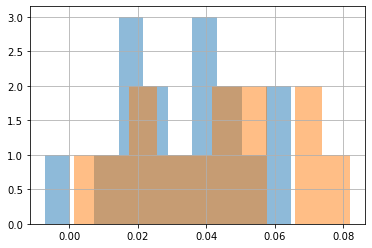

In [399]:
gold[gold["Score"] != 0].groupby("Party_status")["Score"].hist(bins = 10, alpha = 0.5)

Party_status
Coalition     AxesSubplot(0.125,0.125;0.775x0.755)
Opposition    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Negscore, dtype: object

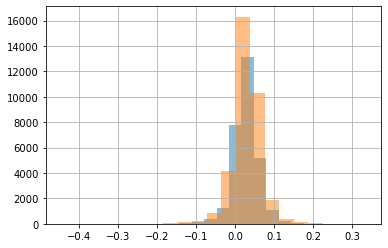

In [402]:
df_bg[df_bg["Negscore"] != 0].groupby("Party_status")["Negscore"].hist(bins = 20, alpha = 0.5)

In [404]:
df_bg[df_bg["Negscore"] != 0].groupby("Party_status", dropna = False)["Negscore"].mean()

Party_status
Coalition     0.027718
Opposition    0.028573
NaN           0.031178
Name: Negscore, dtype: float64

In [61]:
gold[gold["Score"] != 0].groupby(["Party_status"], dropna = False)["Score"].mean()

Party_status
Coalition     0.034032
Opposition    0.041737
NaN           0.055509
Name: Score, dtype: float64

In [57]:
gold.groupby(["Procedural", "Party_status"], dropna = False)["Annotation"].count()

Procedural  Party_status
N           Coalition        8
            Opposition       5
            NaN              6
Y           Coalition       11
            Opposition       8
            NaN              2
Name: Annotation, dtype: int64

In [63]:
gold[gold["Procedural"] == "N"].groupby(["Party_status"], dropna = False)["Annotation"].mean()

Party_status
Coalition    -0.875000
Opposition    0.000000
NaN          -0.166667
Name: Annotation, dtype: float64

In [64]:
gold[gold["Procedural"] == "N"].groupby(["Party_status"], dropna = False)["Score"].mean()

Party_status
Coalition     0.032512
Opposition    0.043960
NaN           0.052103
Name: Score, dtype: float64

In [46]:
gold.groupby(["Party_status"], dropna = False)["Annotation"].count()

Party_status
Coalition     19
Opposition    13
NaN            8
Name: Annotation, dtype: int64

In [47]:
gold.groupby(["Party_status"], dropna = False)["Annotation"].value_counts()

Party_status  Annotation
Coalition      0.0          11
              -2.0           3
              -1.0           3
               1.0           2
Opposition    -1.0           6
               0.0           4
              -2.0           1
               1.0           1
               2.0           1
NaN           -2.0           2
              -1.0           2
               0.0           2
               1.0           2
Name: Annotation, dtype: int64

In [ ]:
gold.groupby(["Party_status"], dropna = False)["Annotation"].value_counts()

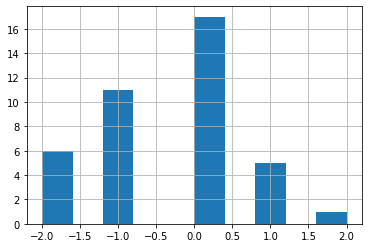

In [37]:
gold["Annotation"].hist();

<AxesSubplot:>

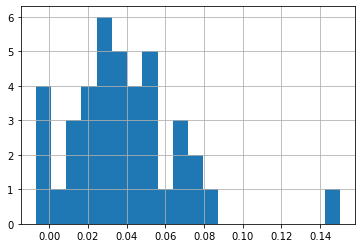

In [225]:
gold["Score"].hist(bins = 20)

<AxesSubplot:>

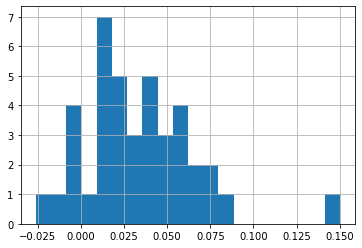

In [226]:
gold["Negscore"].hist(bins = 20)

In [202]:
gold["Negscore"].mean()

0.03362853410473079

In [50]:
from scipy import stats

In [51]:
stats.spearmanr(gold["Annotation"], gold["Score"])

SpearmanrResult(correlation=0.11883677649494621, pvalue=0.4651756743329728)

In [53]:
stats.pearsonr(gold["Annotation"], gold["Score"])

(0.13581049442705984, 0.40338812855746853)

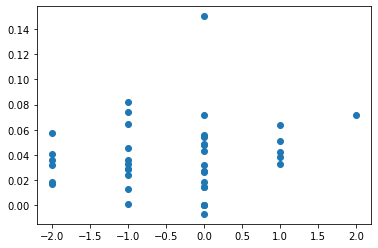

In [194]:
import matplotlib.pyplot as plt

plt.scatter(gold["Annotation"], gold["Score"])

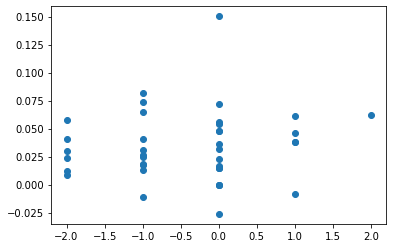

In [203]:
plt.scatter(gold["Annotation"], gold["Negscore"])

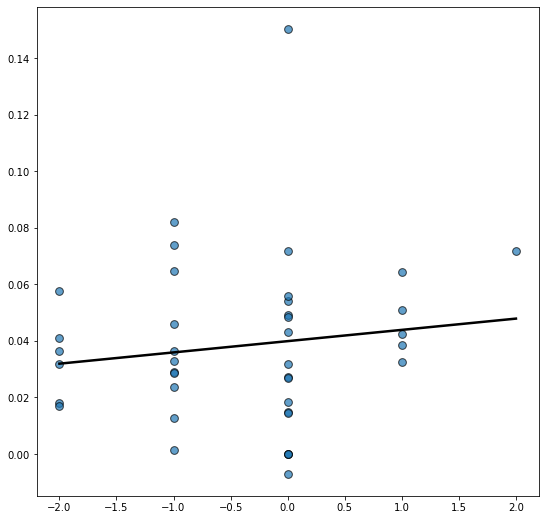

In [59]:
x = gold["Annotation"]
y = gold["Score"]

fig, ax = plt.subplots(figsize = (9, 9))

ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")


b, a = np.polyfit(x, y, deg=1)
xseq = np.linspace(-2, 2, num=100)
ax.plot(xseq, a + b * xseq, color="k", lw=2.5);

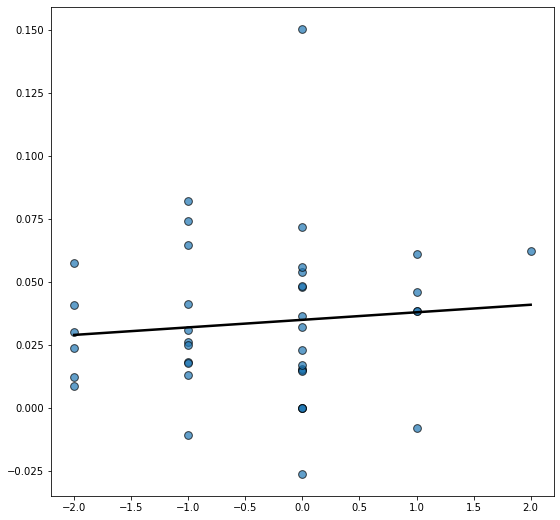

In [205]:
x = gold["Annotation"]
y = gold["Negscore"]

fig, ax = plt.subplots(figsize = (9, 9))

ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")


b, a = np.polyfit(x, y, deg=1)
xseq = np.linspace(-2, 2, num=100)
ax.plot(xseq, a + b * xseq, color="k", lw=2.5);

In [206]:
gold.groupby(["Annotation"])["Score"].mean()

Annotation
-2.0    0.033602
-1.0    0.039169
 0.0    0.035227
 1.0    0.045650
 2.0    0.071583
Name: Score, dtype: float64

In [207]:
gold.groupby(["Annotation"])["Negscore"].mean()

Annotation
-2.0    0.028747
-1.0    0.034598
 0.0    0.032607
 1.0    0.035096
 2.0    0.062280
Name: Negscore, dtype: float64

In [212]:
gold["Negscore"].mean()

0.03362853410473079

In [216]:
gold["Negative"] = gold["Negscore"] < gold["Negscore"].mean()

In [220]:
gold.groupby(["Negative"])["Annotation"].count()

Negative
False    18
True     22
Name: Annotation, dtype: int64

In [218]:
gold["Negative"] = gold["Score"] < gold["Score"].mean()

In [229]:
negative = gold["Score"] < gold["Score"].mean()

In [244]:
gold[gold["Score"] != 0.0]["Score"].median()

0.036296109631572364

In [389]:
interval = gold[gold["Score"] != 0.0]["Score"].std()*0.3
true_mean = gold[gold["Score"] != 0.0]["Score"].mean()

neutral =  gold["Score"].between(true_mean - interval, true_mean + interval)

In [390]:
gold["Label"] = gold["Score"]

In [391]:
gold.loc[negative, "Label"] = -1

In [392]:
gold.loc[~negative, "Label"] = 1

In [393]:
gold.loc[gold["Score"] == 0.0, "Label"] = None
gold.loc[neutral, "Label"] = 0

In [394]:
gold["Label"].value_counts()

 1.0    15
-1.0    13
 0.0     9
Name: Label, dtype: int64

In [395]:
gold["Label_hand"] = gold["Annotation"]
negative = gold["Annotation"] < 0
neutral = gold["Annotation"] == 0
gold.loc[negative, "Label_hand"] = -1
gold.loc[~negative, "Label_hand"] = 1
gold.loc[neutral, "Label_hand"] = 0

In [396]:
gold["Label_hand"].value_counts() 

 0.0    17
-1.0    17
 1.0     6
Name: Label_hand, dtype: int64

In [397]:
from sklearn.metrics import confusion_matrix

gold = dropna
confusion_matrix(gold["Label_hand"], gold["Label"])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [369]:
from sklearn.metrics import accuracy_score

accuracy_score(gold["Label_hand"], gold["Label"])

0.575

In [370]:
gold[["Label", "Label_hand"]]

,Label,Label_hand
417,1.0,0.0
939,0.0,-1.0
1000,1.0,0.0
1155,0.0,0.0
1196,1.0,0.0
1330,1.0,0.0
1419,0.0,-1.0
1602,0.0,1.0
1630,0.0,0.0
1770,-1.0,-1.0


In [374]:
gold.groupby("Party_status", dropna = False)["Label"].mean()

Party_status
Coalition     0.263158
Opposition   -0.153846
NaN          -0.125000
Name: Label, dtype: float64

In [375]:
gold.groupby("Party_status", dropna = False)["Label_hand"].mean()

Party_status
Coalition    -0.210526
Opposition   -0.384615
NaN          -0.250000
Name: Label_hand, dtype: float64

In [221]:
gold.groupby(["Negative"])["Annotation"].count()

Negative
False    18
True     22
Name: Annotation, dtype: int64

In [222]:
gold["Negative"]

417      False
939       True
1000      True
1155      True
1196     False
1330      True
1419      True
1602     False
1630     False
1770     False
2289      True
2518      True
2642      True
3016      True
3102     False
3176     False
4019     False
4215      True
4527     False
4595      True
4832     False
5034      True
5124      True
5554     False
5629     False
5632     False
5873      True
5893      True
5911     False
6482      True
41464    False
42540    False
46115    False
52442     True
54990     True
56118     True
57538     True
61443     True
67493    False
67596     True
Name: Negative, dtype: bool

In [75]:
gold.groupby(["Negative"])["Score"].mean()

Negative
False    0.061351
True     0.019402
Name: Score, dtype: float64

<AxesSubplot:>

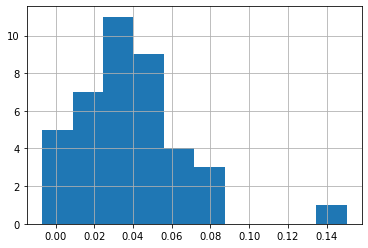

In [77]:
gold["Score"].hist(bins = 10)

In [ ]:
df.loc[m,'Data2']=df.loc[m,'Data2'].replace('bee','ass',regex=True)


In [183]:
gold["Negscore"] = gold["Score"]

In [184]:
negscore = gold.loc[:, "Negscore"]

In [185]:
m =negscore < 0.038

In [186]:
gold.loc[m, "Negscore"] = np.abs(gold.loc[m, "Negscore"])*(-2)

In [187]:
gold["Negscore"]

417      0.071840
939     -0.072592
1000    -0.029726
1155    -0.000000
1196     0.150310
1330    -0.013895
1419    -0.072460
1602     0.042351
1630     0.049035
1770     0.081902
2289    -0.057637
2518    -0.047667
2642    -0.064932
3016    -0.057260
3102     0.054000
3176     0.064154
4019     0.057570
4215    -0.054642
4527     0.050833
4595    -0.053409
4832     0.064606
5034    -0.065941
5124    -0.036253
5554     0.042963
5629     0.045798
5632     0.040856
5873    -0.025606
5893    -0.028794
5911     0.073879
6482    -0.063914
41464    0.048253
42540    0.055947
46115    0.071583
52442   -0.000000
54990   -0.000000
56118   -0.036427
57538   -0.034210
61443   -0.002648
67493    0.038446
67596   -0.063447
Name: Negscore, dtype: float64

In [85]:
gold[gold["Score"] > 0.038]["Score"]

417      0.071840
1196     0.150310
1602     0.042351
1630     0.049035
1770     0.081902
3102     0.054000
3176     0.064154
4019     0.057570
4527     0.050833
4832     0.064606
5554     0.042963
5629     0.045798
5632     0.040856
5911     0.073879
41464    0.048253
42540    0.055947
46115    0.071583
67493    0.038446
Name: Score, dtype: float64